# 💬 TMCD – Trabalho Final
## Análise de Sentimento

### 👥 Grupo Trab-grupo-30
- **Rafael Alexandre Dias Andorinha**, nº 131000  
- **Pedro Fonte Santa**, nº 105306  

---

📅 **Data de entrega:** 26 de abril  
📊 **Objetivo deste script:** COMPLETAR....

---

# 🗂️ Dataset: IMDB Reviews

## 2.2 Definição de um baseline usando ferramentas já existentes

----------------

Este capitulo tem como objetivo realizar uma análise de sentimentos em reviews do dataset IMDB,
recorrendo a ferramentas de análise de sentimento já existentes. Esta etapa corresponde à Tarefa 2.2 do trabalho.

Será avaliado o desempenho de duas ferramentas distintas — TextBlob e VADER — aplicadas sobre o conjunto de teste.
As métricas de avaliação utilizadas serão a precisão (accuracy), precisão positiva (precision), cobertura (recall)
e a medida F1.

O objetivo principal é definir um baseline simples, a partir do qual será possível comparar melhorias em etapas futuras.

----------------

In [ ]:
# Instalação de bibliotecas caso necessário
!pip install -q textblob vaderSentiment nltk

# Imports
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
nltk.download('punkt')

# Inicialização de analisadores
vader = SentimentIntensityAnalyzer()

In [5]:
# Carregamento do dataset de teste
df_test = pd.read_csv("dataset/imdb_reviews_test.csv") 
df_test.head()

,text,label
0,Logan Lerman & Dean Collins III of Jack & Bobb...,pos
1,I have seen this film on a Sunday evening and ...,pos
2,Two great stars and a legendary Director creat...,pos
3,I'm originally from Brazil... the sad thing ab...,pos
4,"""Witchery"" is a decent little Euro Trash horro...",pos


In [6]:
# Verificar distribuição das classes
df_test['label'].value_counts()

label
neg    11050
pos    10946
Name: count, dtype: int64

In [7]:
# Conversão de polaridade contínua para classes ('pos' ou 'neg')
def get_sentiment_from_polarity(polarity):
    return 'pos' if polarity >= 0 else 'neg'

# Função para avaliar os resultados
def avaliar(y_true, y_pred, nome_modelo):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label='pos')
    rec = recall_score(y_true, y_pred, pos_label='pos')
    f1 = f1_score(y_true, y_pred, pos_label='pos')
    
    print(f"\n--- {nome_modelo} ---")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precisão : {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")
    
    return {'Modelo': nome_modelo, 'Accuracy': acc, 'Precisão': prec, 'Recall': rec, 'F1': f1}

### 🧪 Classificação com TextBlob

In [8]:
# Aplicação da análise de sentimentos com TextBlob
def aplicar_textblob(texto):
    return TextBlob(texto).sentiment.polarity

df_test['pol_tb'] = df_test['text'].apply(aplicar_textblob)
df_test['pred_tb'] = df_test['pol_tb'].apply(get_sentiment_from_polarity)

# Avaliação
resultados_tb = avaliar(df_test['label'], df_test['pred_tb'], 'TextBlob')


--- TextBlob ---
Accuracy : 0.701
Precisão : 0.633
Recall   : 0.950
F1 Score : 0.760


### 🧪 Classificação com VADER

In [9]:
# Aplicação da análise de sentimentos com VADER
def aplicar_vader(texto):
    return vader.polarity_scores(texto)['compound']

df_test['pol_vader'] = df_test['text'].apply(aplicar_vader)
df_test['pred_vader'] = df_test['pol_vader'].apply(get_sentiment_from_polarity)

# Avaliação
resultados_vader = avaliar(df_test['label'], df_test['pred_vader'], 'VADER')


--- VADER ---
Accuracy : 0.703
Precisão : 0.650
Recall   : 0.872
F1 Score : 0.745


### 📊 Comparação Final dos Modelos

In [10]:
# Compilação dos resultados
df_resultados = pd.DataFrame([resultados_tb, resultados_vader])
df_resultados

,Modelo,Accuracy,Precisão,Recall,F1
0,TextBlob,0.701264,0.633246,0.949753,0.759858
1,VADER,0.702628,0.650024,0.871825,0.744761


### 📊 Gráfico de barras para comparar métricas (Accuracy, Precisão, Recall, F1)

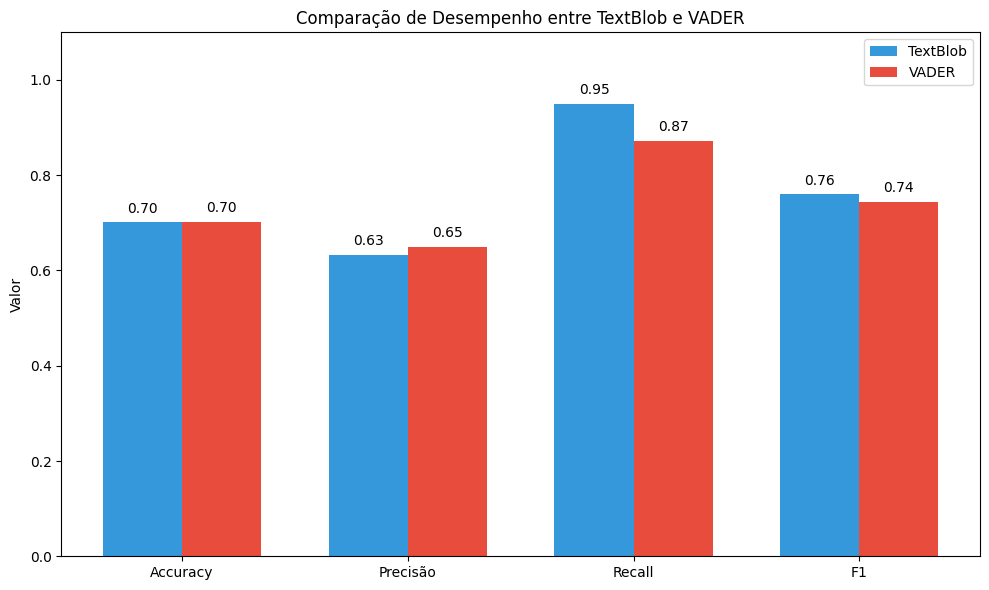

In [11]:
import matplotlib.pyplot as plt

# Definir dados
modelos = df_resultados['Modelo']
metricas = ['Accuracy', 'Precisão', 'Recall', 'F1']
cores = ['#3498db', '#e74c3c']  # Azul e vermelho só para dar aquele toque

# Preparar os valores
valores = df_resultados[metricas].values.T

# Criar gráfico de barras
x = np.arange(len(metricas))
largura = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - largura/2, valores[:, 0], largura, label=modelos[0], color=cores[0])
ax.bar(x + largura/2, valores[:, 1], largura, label=modelos[1], color=cores[1])

# Personalização
ax.set_ylabel('Valor')
ax.set_title('Comparação de Desempenho entre TextBlob e VADER')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()
ax.set_ylim(0, 1.1)

# Mostrar valores nas barras
for i in range(len(metricas)):
    ax.text(x[i] - largura/2, valores[i, 0] + 0.02, f"{valores[i, 0]:.2f}", ha='center')
    ax.text(x[i] + largura/2, valores[i, 1] + 0.02, f"{valores[i, 1]:.2f}", ha='center')

plt.tight_layout()
plt.show()